In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
all_feature = pd.concat((train.iloc[:,2:], test.iloc[:,1:]))

In [3]:
Age_temp = all_feature['Age'].to_numpy()
Age_temp = Age_temp.reshape(-1, 1)

In [4]:
from sklearn.preprocessing import StandardScaler
Sclaer = StandardScaler()
Sclaer.fit(Age_temp)
Age_temp = Sclaer.transform(Age_temp)

In [5]:
all_feature['Age'] = Age_temp

In [6]:
all_feature = all_feature.fillna(0)

<AxesSubplot:>

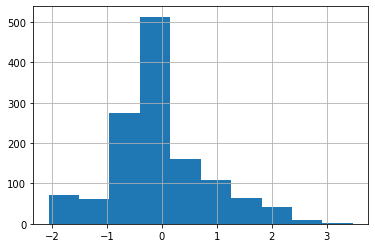

In [7]:
all_feature['Age'].hist()

In [58]:
all_feature.pop('Name')

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [59]:
all_feature

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,-0.547050,1,0,A/5 21171,7.2500,0,S
1,1,female,0.563552,1,0,PC 17599,71.2833,C85,C
2,3,female,-0.269400,0,0,STON/O2. 3101282,7.9250,0,S
3,1,female,0.355314,1,0,113803,53.1000,C123,S
4,3,male,0.355314,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
413,3,male,0.000000,0,0,A.5. 3236,8.0500,0,S
414,1,female,0.632964,0,0,PC 17758,108.9000,C105,C
415,3,male,0.598258,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,3,male,0.000000,0,0,359309,8.0500,0,S


In [60]:
all_feature = pd.get_dummies(all_feature, dummy_na=True)

In [61]:
all_feature

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Ticket_110152,Ticket_110413,...,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_0,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,3,-0.547050,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0.563552,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,-0.269400,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0.355314,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,0.355314,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0.000000,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
414,1,0.632964,0,0,108.9000,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
415,3,0.598258,0,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
416,3,0.000000,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
X_train = all_feature.iloc[:891,:]
X_test = all_feature.iloc[891:,:]
y_train = train.iloc[:,1]

In [63]:
from sklearn.ensemble import RandomForestClassifier
Random_modle = RandomForestClassifier()
Random_modle.fit(X_train,y_train)
pred_train=Random_modle.predict(X_train)
Random_modle.score(X_train, y_train)

0.9988776655443322

In [64]:
summit = pd.DataFrame()
summit['PassengerId'] = test['PassengerId']
summit['Survived'] = Random_modle.predict(X_test)
summit.to_csv('Survived_predict.csv',index=False)

In [65]:
summit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 랜덤서치를 이용한 하이퍼파라미터 튜닝

In [66]:
from scipy.stats import randint
param_distribs = {'n_estimators': randint(low=100, high=500), 
                  'max_features': ['auto', 'sqrt', 'log2']}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
print("파라미터 결과 : {}".format(random_search.best_params_))

파라미터 결과 : {'max_features': 'log2', 'n_estimators': 418}


In [67]:
Random_modle = RandomForestClassifier(max_features='log2', n_estimators=488)
Random_modle.fit(X_train,y_train)
pred_train=Random_modle.predict(X_train)
Random_modle.score(X_train, y_train)
summit = pd.DataFrame()
summit['PassengerId'] = test['PassengerId']
summit['Survived'] = Random_modle.predict(X_test)
summit.to_csv('Survived_predict.csv',index=False)

### 배깅 & 평가기준

In [68]:
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor

from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
model_xgb.predict(X_test)

summit = pd.DataFrame()
summit['PassengerId'] = test['PassengerId']
summit['Survived'] = model_xgb.predict(X_test)
summit.to_csv('Survived_predict.csv', index=False)

In [ ]:
summit = pd.DataFrame()
summit['PassengerId'] = test['PassengerId']
summit['Survived'] = model.predict(X_test)

In [ ]:
summit.to_csv('Survived_predict.csv', index=False)

In [ ]:
from scipy.stats import randint
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_train, y_train)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score: {:.4f}".format(random_search.best_score_))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr', SVC(random_state=42))]
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model.fit(X_train, y_train)
pred_train=model.predict(X_train)
model.score(X_train, y_train)

In [ ]:
help(train_test_split)